
# Task 2 : Prediction using Unsupervised ML


# Name : Divyansh Kogta

<br>


## Problem Statement

*  <b>From the given ‘Iris’ dataset, predict the optimum number of clusters
      and represent it visually. </b>

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Importing the dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# shape
df.shape

(150, 6)

In [8]:
# description
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
# Species distribution
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [14]:
# Checking if there is any missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Visualization

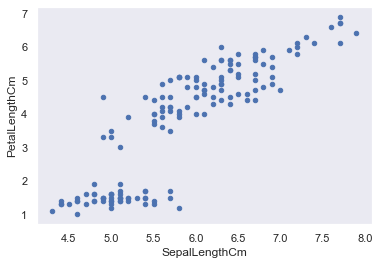

In [139]:
# Scatter Plot using Pandas
df.plot(kind ="scatter", 
          x ='SepalLengthCm', 
          y ='PetalLengthCm', c='b') 
plt.grid()

Text(0.5, 1.0, 'Scatter plot')

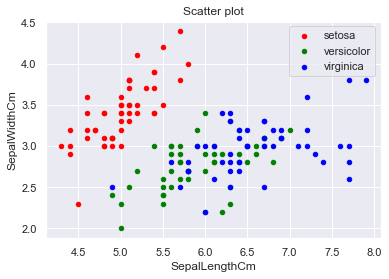

In [129]:
# Scatter plot using pandas
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("Scatter plot")

In [59]:
# Importing Seaborn
import seaborn as sns 

<AxesSubplot:>

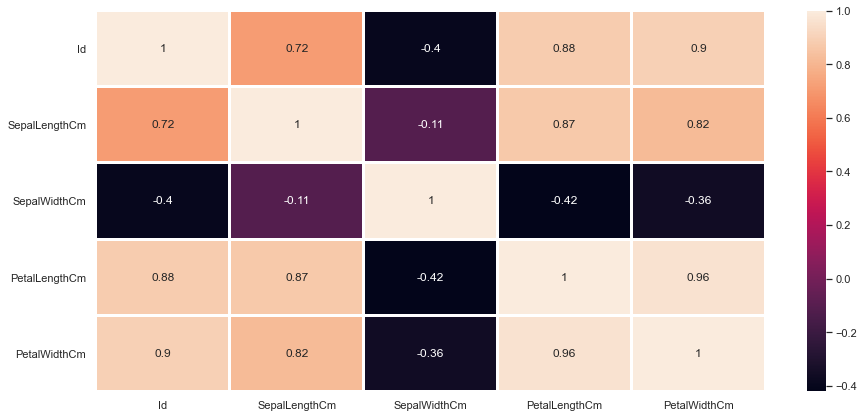

In [124]:
# Plotting on Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=2)

In [60]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


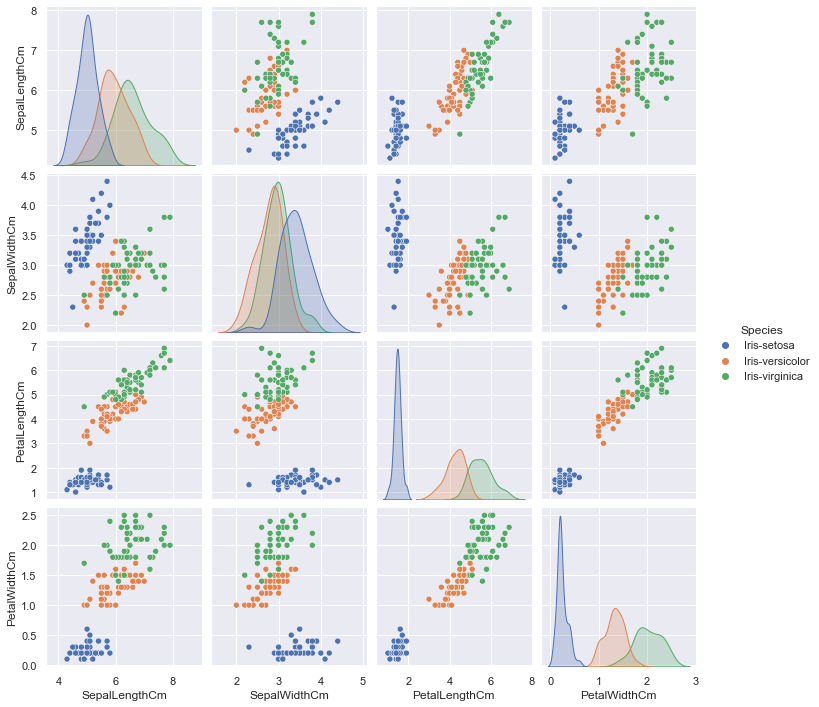

In [58]:
# Paired plot using seaborn
sns.set()
sns.pairplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],
             hue="Species", diag_kind="kde")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


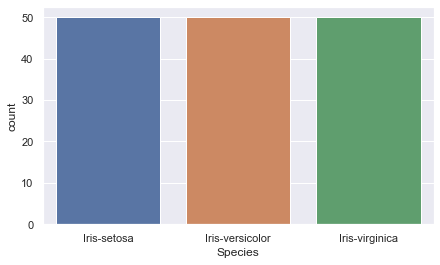

In [142]:
plt.figure(figsize=(7,4))
sns.countplot('Species', data=df)
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


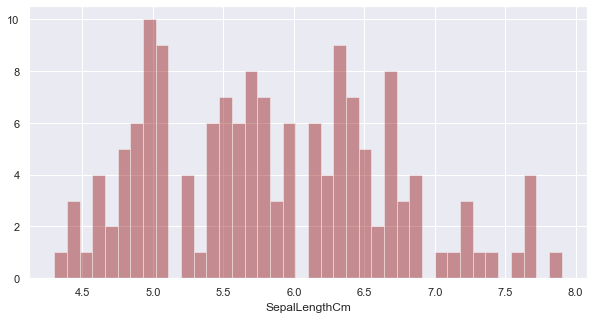

In [144]:
plt.figure(figsize=(10,5))
sns.distplot(df['SepalLengthCm'], kde=False, color='darkred', bins=40)
plt.show()

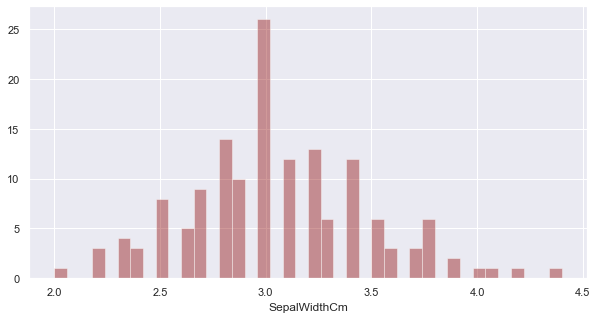

In [116]:
plt.figure(figsize=(10,5))
sns.distplot(df['SepalWidthCm'], kde=False, color='darkred', bins=40)
plt.show()

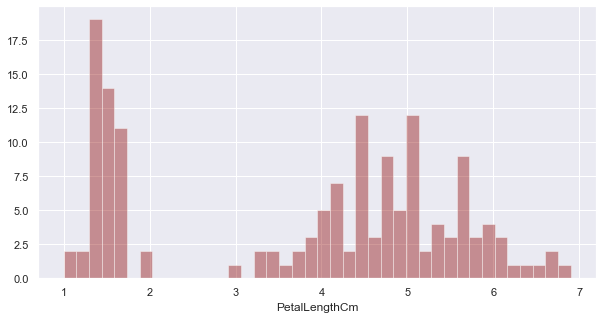

In [117]:
plt.figure(figsize=(10,5))
sns.distplot(df['PetalLengthCm'], kde=False, color='darkred', bins=40)
plt.show()

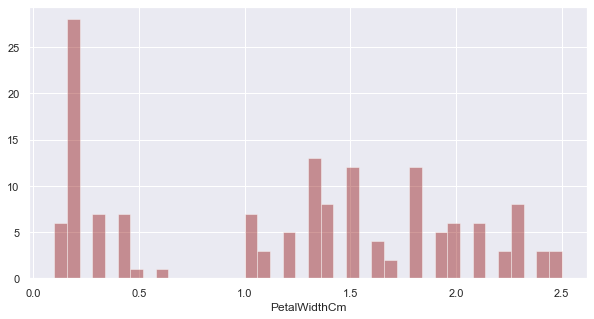

In [118]:
plt.figure(figsize=(10,5))
sns.distplot(df['PetalWidthCm'], kde=False, color='darkred', bins=40)
plt.show()

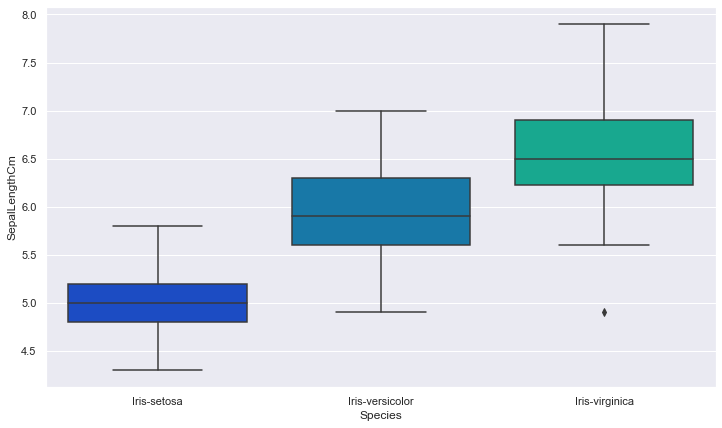

In [76]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Species', y='SepalLengthCm',data=df, palette='winter')
plt.show()

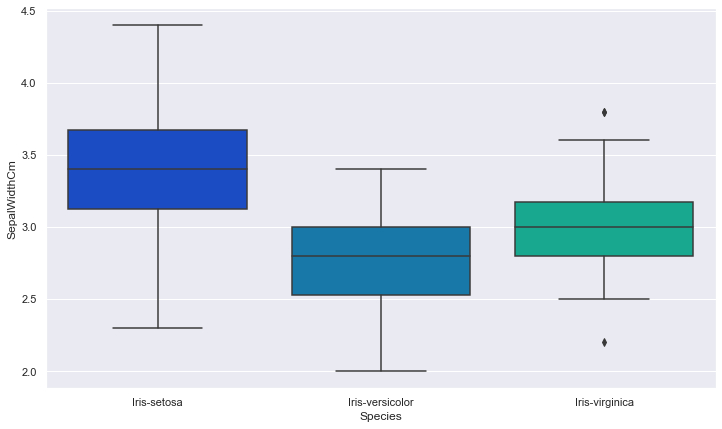

In [78]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Species', y='SepalWidthCm',data=df, palette='winter')
plt.show()

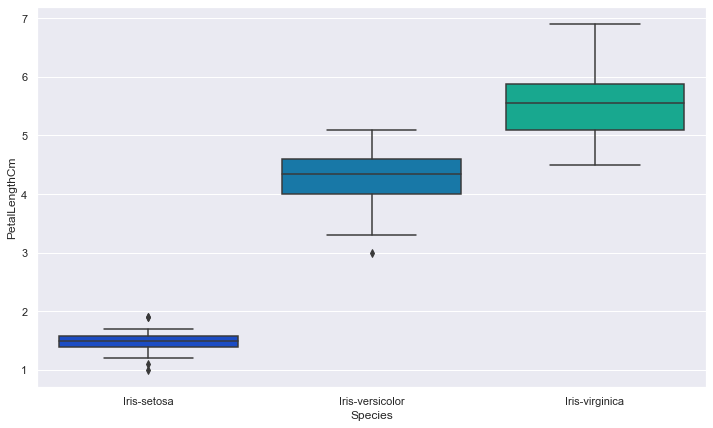

In [79]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Species', y='PetalLengthCm',data=df, palette='winter')
plt.show()

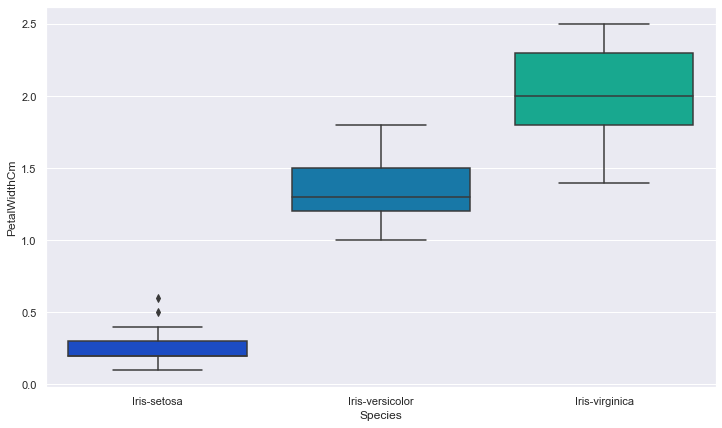

In [80]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Species', y='PetalWidthCm',data=df, palette='winter')
plt.show()

# Elbow Method using Within Cluster Sum of Squares(WCSS)
 * We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS)
  then we select the number of clusters where the change in WCSS begins to level off (elbow method).
  
 * WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid. 

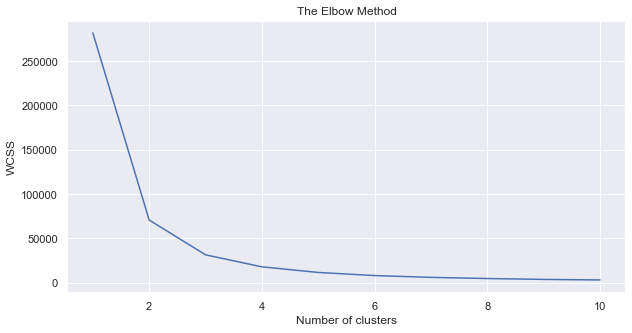

In [114]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

* The optimum clusters is where the elbow occurs. This is when change in WCSS begins to level off WCSS doesn't decrease           significantly with every iteration.

* From this we choose the number of clusters as **3**.

In [102]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

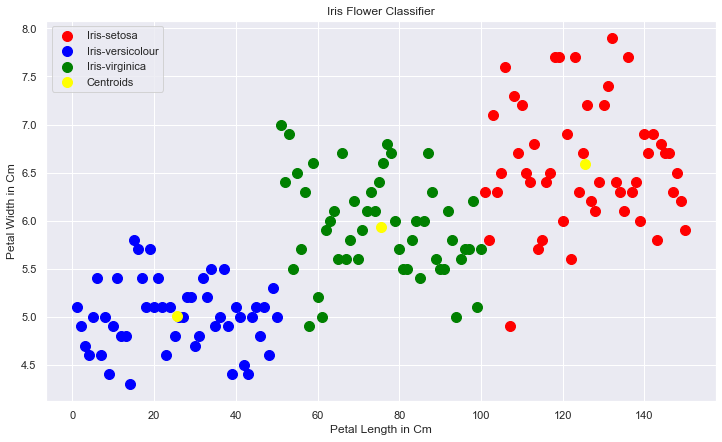

In [110]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(12,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('Petal Length in Cm')
plt.ylabel('Petal Width in Cm')
plt.title('Iris Flower Classifier')
plt.legend()
plt.show()